Logistic Regression
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC: 0.8248566802481361
Random Forest
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

ROC AUC: 0.8084852736466336


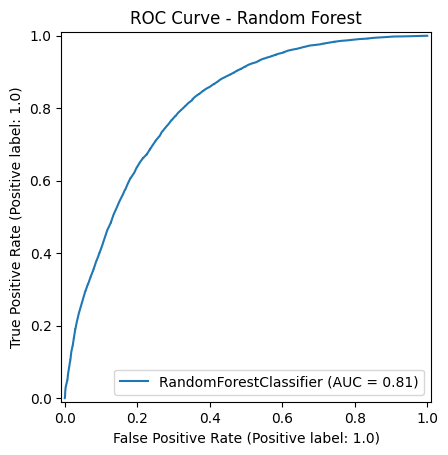

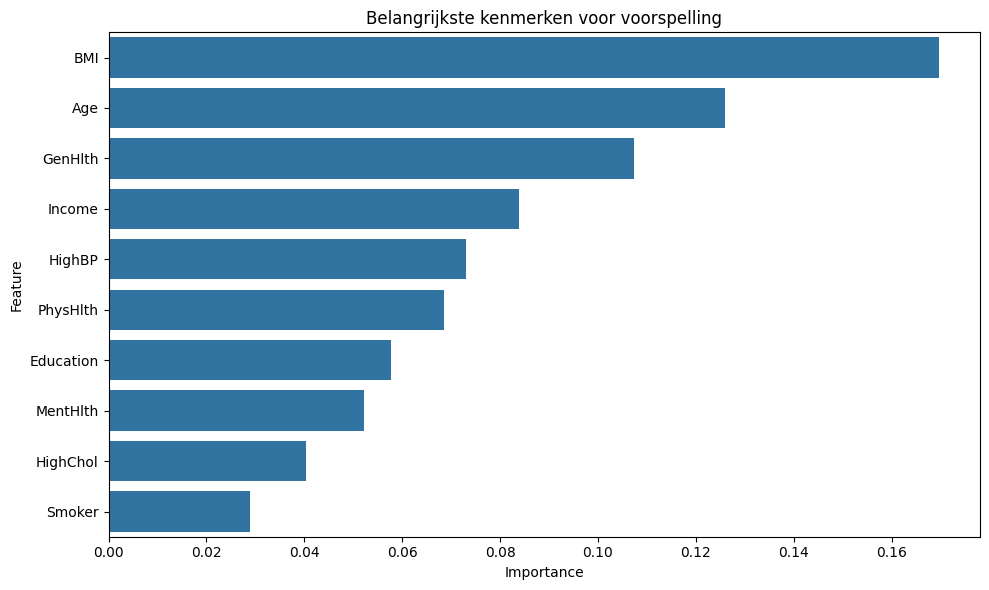

In [2]:
# 02_model_training_en_evaluatie.ipynb

# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Data inladen
df = pd.read_csv("C:/Users/Gebruiker/OneDrive/Documenten/Data making/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Features & target definieren
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# Feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Belangrijkste kenmerken voor voorspelling")
plt.tight_layout()
plt.show()